In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold


import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn import svm
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('Call.csv')

In [4]:
df.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0


In [5]:
nan_cols= [i for i in df.columns if df[i].isnull().any()]
print(nan_cols)

[]


In [6]:
df.isnull().any() #missing data yok hiçbirinde

VMail Message    False
Day Mins         False
Day Calls        False
Day Charge       False
Eve Mins         False
Eve Calls        False
Eve Charge       False
Night Mins       False
Night Calls      False
Night Charge     False
Intl Mins        False
Intl Calls       False
Intl Charge      False
Churn            False
dtype: bool

In [7]:
y = np.array(df['Churn'])
x= df.drop('Churn', axis = 1)


In [8]:
df_list = list(df.columns)
df_list

['VMail Message',
 'Day Mins',
 'Day Calls',
 'Day Charge',
 'Eve Mins',
 'Eve Calls',
 'Eve Charge',
 'Night Mins',
 'Night Calls',
 'Night Charge',
 'Intl Mins',
 'Intl Calls',
 'Intl Charge',
 'Churn']

In [9]:
df.head()

,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,Churn
0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,0
1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,0
2,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,0
4,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,0


<AxesSubplot:>

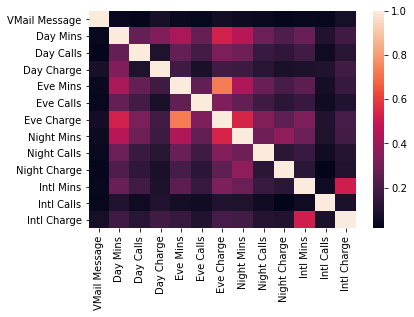

In [10]:
corr = x.corr()
sns.heatmap(corr)

In [26]:
clfNew = DecisionTreeClassifier(random_state=42)
bgcNew = BaggingClassifier(base_estimator=clfNew, n_estimators=10, random_state=42)
rfcNew = RandomForestClassifier(n_estimators=10, max_features=10,random_state=42)
abcNew = AdaBoostClassifier(n_estimators=10, random_state=42)
sgbNew = GradientBoostingClassifier(n_estimators=10, random_state=42)
etcNew = ExtraTreesClassifier(n_estimators=100, max_features=5,random_state=42)
cbNew = CatBoostClassifier(random_state=42)
svcf = svm.LinearSVC(random_state=42)


In [27]:
clf_cv_score = cross_val_score(clfNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - DTR: ", clf_cv_score.mean())

bgc_cv_score = cross_val_score(bgcNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - BAG: ", bgc_cv_score.mean())

rfc_cv_score = cross_val_score(rfcNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - RFC: ", rfc_cv_score.mean())

abc_cv_score = cross_val_score(abcNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - ADA: ", abc_cv_score.mean())

sgb_cv_score = cross_val_score(sgbNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - GBC: ", sgb_cv_score.mean())

etc_cv_score = cross_val_score(etcNew, x, y, cv=5, scoring='accuracy')
print("accuracy Score - ETC: ", etc_cv_score.mean())



accuracy Score - DTR:  0.9452999999999999
accuracy Score - BAG:  0.9610333333333333
accuracy Score - RFC:  0.9616
accuracy Score - ADA:  0.8602333333333334
accuracy Score - GBC:  0.8617666666666665
accuracy Score - ETC:  0.9634333333333334


In [28]:
clf_cv_score = cross_val_score(clfNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - DTR: ", clf_cv_score.mean())

bgc_cv_score = cross_val_score(bgcNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - BAG: ", bgc_cv_score.mean())

rfc_cv_score = cross_val_score(rfcNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - RFC: ", rfc_cv_score.mean())

abc_cv_score = cross_val_score(abcNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - ADA: ", abc_cv_score.mean())

sgb_cv_score = cross_val_score(sgbNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - GBC: ", sgb_cv_score.mean())

etc_cv_score = cross_val_score(etcNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - ETC: ", etc_cv_score.mean())




Mean AUC Score - DTR:  0.8954326839129292
Mean AUC Score - BAG:  0.9187987727256303
Mean AUC Score - RFC:  0.9150549611166809
Mean AUC Score - ADA:  0.6460046919494838
Mean AUC Score - GBC:  0.634866138511218
Mean AUC Score - ETC:  0.9285256576705783


In [14]:
cb_cv_score = cross_val_score(cbNew, x, y, cv=5, scoring='roc_auc')
print("Mean AUC Score - CB: ", cb_cv_score.mean())

Learning rate set to 0.040021
0:	learn: 0.6651510	total: 69.8ms	remaining: 1m 9s
1:	learn: 0.6421313	total: 83.8ms	remaining: 41.8s
2:	learn: 0.6197719	total: 98.3ms	remaining: 32.7s
3:	learn: 0.5994474	total: 114ms	remaining: 28.4s
4:	learn: 0.5819086	total: 137ms	remaining: 27.3s
5:	learn: 0.5644487	total: 166ms	remaining: 27.6s
6:	learn: 0.5497353	total: 185ms	remaining: 26.2s
7:	learn: 0.5355601	total: 206ms	remaining: 25.5s
8:	learn: 0.5229303	total: 230ms	remaining: 25.3s
9:	learn: 0.5112123	total: 246ms	remaining: 24.3s
10:	learn: 0.5007297	total: 261ms	remaining: 23.4s
11:	learn: 0.4904045	total: 279ms	remaining: 22.9s
12:	learn: 0.4816261	total: 296ms	remaining: 22.5s
13:	learn: 0.4735123	total: 314ms	remaining: 22.1s
14:	learn: 0.4662030	total: 332ms	remaining: 21.8s
15:	learn: 0.4594668	total: 360ms	remaining: 22.2s
16:	learn: 0.4526901	total: 380ms	remaining: 22s
17:	learn: 0.4469174	total: 394ms	remaining: 21.5s
18:	learn: 0.4408551	total: 412ms	remaining: 21.3s
19:	learn:

### Hyperparameter Tuning

In [15]:
#best model is Extra Tree Classifier with 
# ROC AUC: 0.9280
# Accuracy: 0.9636


#### Random and Grid Search

In [16]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': list(np.linspace(10, 50, 5, dtype = int)) + [None],
               'max_features': ['auto', 'sqrt','log2', None],
               'min_samples_leaf': [4, 6, 8, 12],
               'min_samples_split': [5, 7, 10, 14],
               'n_estimators': list(np.linspace(20, 100, 5, dtype = int))}

clf = ExtraTreesClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 100, 
                               cv = 5, verbose= 5, random_state= 101, n_jobs = -1)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)
model.fit(train_x,train_y)

predictionforest = model.best_estimator_.predict(test_x)
prob_predictionforest= model.best_estimator_.predict_proba(test_x)[:,1]
print("ETC Accuracy Score: ",metrics.accuracy_score(test_y,predictionforest))
print ("ETC AUC Score:", metrics.roc_auc_score(test_y, prob_predictionforest))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
ETC Accuracy Score:  0.9558333333333333
ETC AUC Score: 0.9588851609930161


In [18]:
grid_search = {
    'criterion': [model.best_params_['criterion']],
    'max_depth': [model.best_params_['max_depth']],
    'max_features': [model.best_params_['max_features']],
    'min_samples_leaf': [model.best_params_['min_samples_leaf'] - 1, 
                         model.best_params_['min_samples_leaf'], 
                         model.best_params_['min_samples_leaf'] + 1],
    'min_samples_split': [model.best_params_['min_samples_split'] - 1, 
                          model.best_params_['min_samples_split'], 
                          model.best_params_['min_samples_split'] + 1],
    'n_estimators': [model.best_params_['n_estimators'] - 10, 
                     model.best_params_['n_estimators'], 
                     model.best_params_['n_estimators'] + 10]
}

clf = ExtraTreesClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 5, verbose= 5, n_jobs = -1)
model.fit(train_x,train_y)

print("Grid")
predictionforest = model.best_estimator_.predict(test_x)
prob_predictionforest = model.best_estimator_.predict_proba(test_x)[:,1]


print(" ETC Accuracy:",metrics.accuracy_score(test_y,predictionforest))
print("AUC Score:",metrics.roc_auc_score(test_y,prob_predictionforest))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Grid
 ETC Accuracy: 0.9595
AUC Score: 0.9628038289085599


##### Bayesian optimization

In [19]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 50, 5),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.choice ('min_samples_leaf',  [4, 6, 8,12]),
        'min_samples_split' : hp.choice ('min_samples_split',  [5, 7, 10,14]),
        'n_estimators' : hp.choice('n_estimators', [20, 40, 60,80,100])
    }

def objective(space):
    model = ExtraTreesClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, train_x, train_y, cv = 5).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 100,
            trials= trials)
best



crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
leaf = {0: 4, 1: 6, 2: 8, 3:12}
split = {0: 5, 1: 7, 2: 10, 3:14}
est = {0: 20, 1: 40, 2: 60, 3:80, 4:100}

trainedforest = ExtraTreesClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = leaf[best['min_samples_leaf']], 
                                       min_samples_split = split[best['min_samples_split']], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(train_x,train_y)

predictionforest = trainedforest.predict(test_x)
prob_predictionforest= trainedforest.predict_proba(test_x)[:,1]

print(metrics.accuracy_score(test_y,predictionforest))
print(metrics.roc_auc_score(test_y,prob_predictionforest))





100%|██████████| 100/100 [15:13<00:00,  9.13s/trial, best loss: -0.9539583333333332]
0.9591666666666666
0.9656353205602997


In [20]:
print(model.best_params_)

{'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 20}


In [22]:
#accuracy 0.9591
#auc 0.9656
#{'criterion': 'gini', 'max_depth': 40, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 20}